In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dr = pd.read_csv("/diabetes2.csv.xls")

In [3]:
dr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Visualization of occurance of Diabetic retinopathy based on diabetic and non diabetic patients Age and BMI

0: Indicates that the individual does not have diabetes (negative test result).
1: Indicates that the individual has diabetes (positive test result).

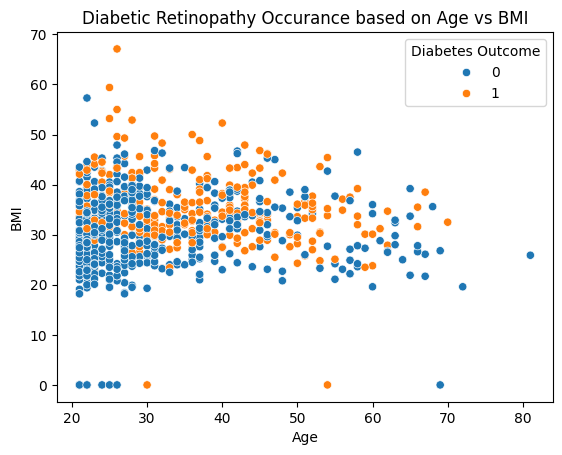

In [18]:
sns.scatterplot(data=dr, x="Age", y="BMI", hue="Outcome")
plt.title("Diabetic Retinopathy Occurance based on Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Diabetes Outcome", loc="upper right")
plt.show()


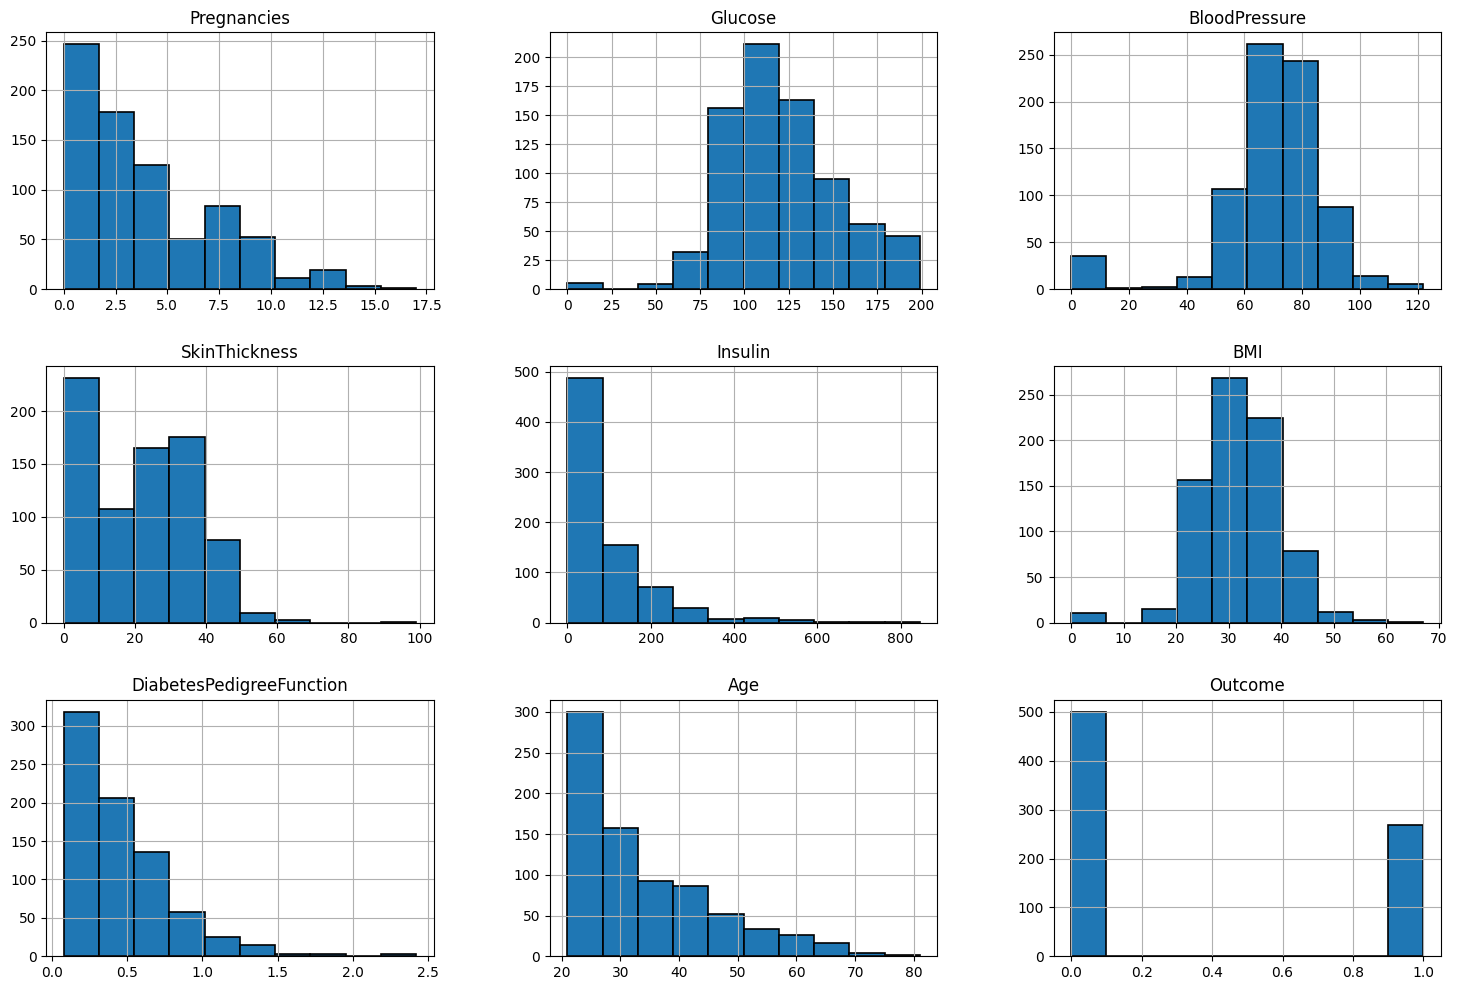

In [20]:
dr.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(18,12)
plt.show()

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

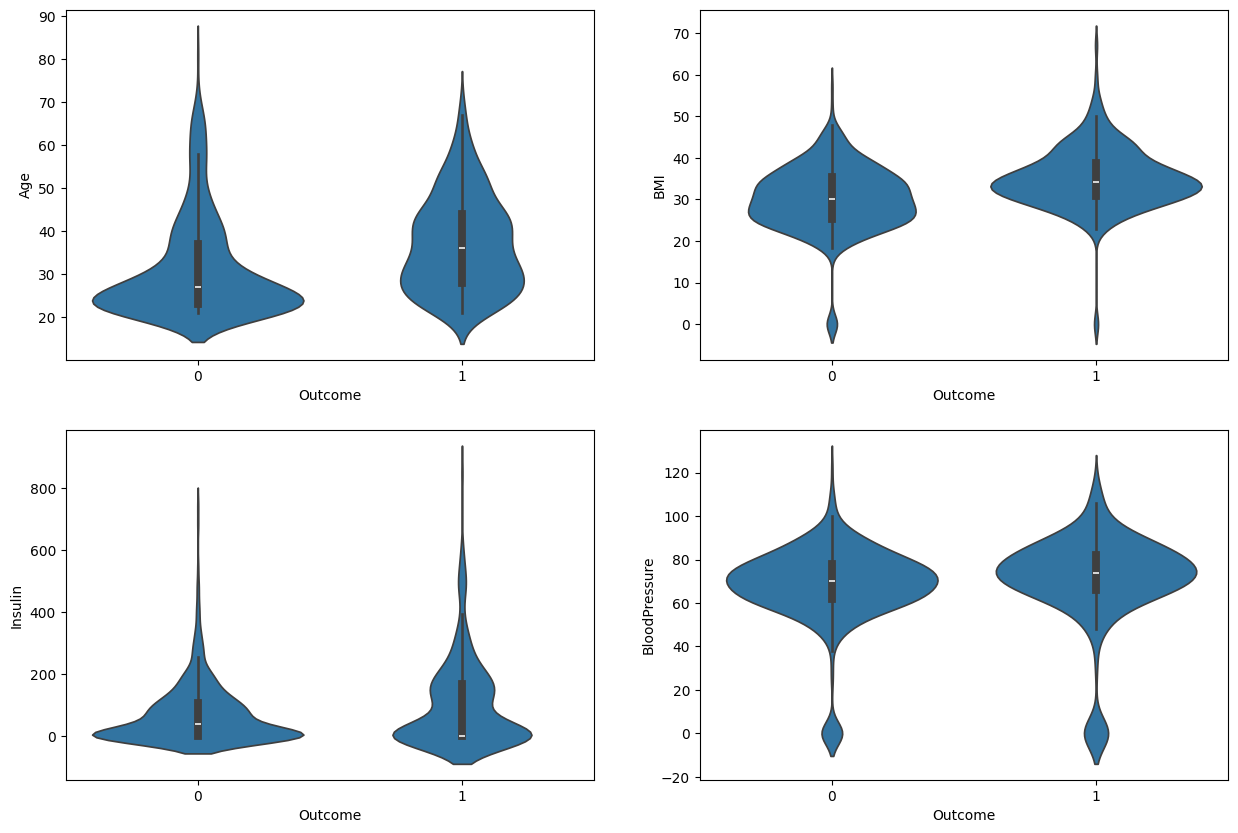

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Outcome', y = 'Age', data=dr)
plt.subplot(2,2,2)
sns.violinplot(x='Outcome', y = 'BMI', data=dr) # Changed 'outcome' to 'Outcome'

plt.subplot(2,2,3)
sns.violinplot(x='Outcome', y = 'Insulin', data=dr)
plt.subplot(2,2,4)
sns.violinplot(x='Outcome', y = 'BloodPressure', data=dr)

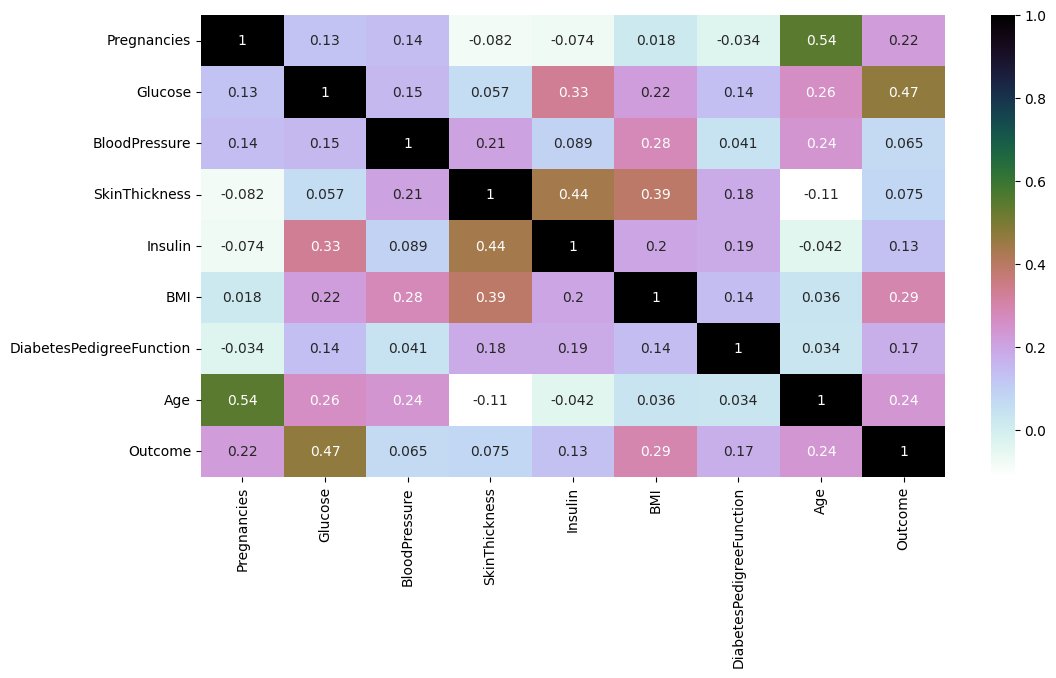

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dr.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [27]:
dr.shape

(768, 9)

In [38]:
train, test = train_test_split(dr, test_size=0.4)
print(train.shape)
print(test.shape)

(460, 9)
(308, 9)


In [60]:
train_X = train[['Age','BMI','Insulin','BloodPressure','DiabetesPedigreeFunction']]
train_y = train.Outcome

test_X = test[['Age','BMI','Insulin','BloodPressure','DiabetesPedigreeFunction']]
test_y = test.Outcome

In [61]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is:  0.711038961038961


In [62]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.698051948051948


In [63]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.6331168831168831


<ipython-input-64-096afee3910b>:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  a = pd.concat([a, pd.Series(metrics.accuracy_score(prediction, test_y))], ignore_index=True)


([<matplotlib.axis.XTick at 0x7c87515d7a60>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

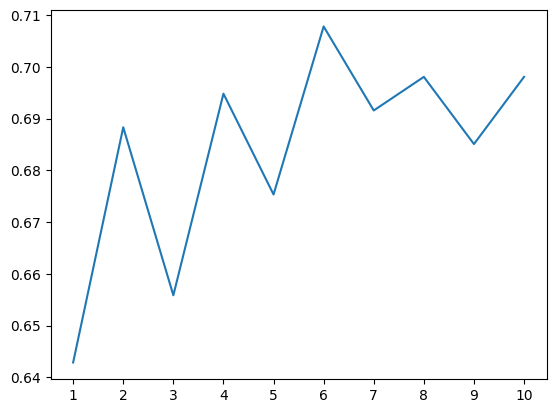

In [64]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    # Use pd.concat instead of append
    a = pd.concat([a, pd.Series(metrics.accuracy_score(prediction, test_y))], ignore_index=True)
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

In [65]:
train_X = train[['Age']]
train_y = train.Outcome

test_X = test[['Age']]
test_y = test.Outcome
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is:  0.672077922077922


In [66]:
train_X = train[['BMI']]
train_y = train.Outcome

test_X = test[['BMI']]
test_y = test.Outcome
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is:  0.7207792207792207
